<div style="border-radius: 5px; border: 10px solid #9B8BA8; padding: 15px; background-color: transparent; font-size: 180%; text-align: center;">
    <strong>⚾ Salary Prediction for Baseball Hitters ⚾</strong>
</div>

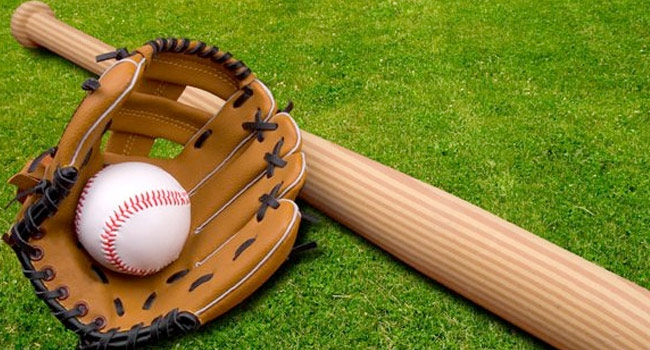

# Introduction
> 



AtBat: Number of hits with a baseball bat in the 1986-1987 season.
    
    
Hits: Number of successful hits in the 1986-1987 season.
    
    
HmRun: Number of home runs in the 1986-1987 season.
    
    
Runs: Number of runs scored for the team in the 1986-1987 season.
    
    
RBI: Number of runs batted in, i.e., runs scored due to a batter's hits in the 1986-1987 season.
    
    
Walks: Number of walks, i.e., instances where the opposing pitcher throws four balls to a batter, in the 1986-1987 season.
    
    
Years: Number of years the player has played in the major league.
    
    
CAtBat: Number of times the player has batted throughout their career.
    
    
CHits: Number of successful hits the player has made throughout their career.
    
    
CHmRun: Number of home runs the player has hit throughout their career.
    
    
CRuns: Number of runs the player has scored for the team throughout their career.
    
    
CRBI: Number of runs batted in by the player throughout their career.
    
    
CWalks: Number of walks drawn by the player throughout their career.
    
    
League: A factor indicating the league the player played in until the end of the season, with levels A and N.
    
    
Division: A factor indicating the player's position at the end of 1986, with levels E and W.
    
    
PutOuts: Team-assisted plays during a game.
    
    
Assists: Number of assists made by the player in the 1986-1987 season.
    
    
Errors: Number of errors made by the player in the 1986-1987 season.
    
    
Salary: Player's salary for the 1986-1987 season (in thousands).
    
    
NewLeague: A factor indicating the league the player played in at the beginning of the 1987 season, with levels A and N.
  




> #  Advanced Functional EDA

*  ***Library Import***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

*   ***Data Loading***

In [3]:
df= pd.read_csv("/kaggle/input/hitters/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [4]:

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
check_df(df)


##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29 

In [5]:
df.describe()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,263.000
mean,380.929,101.025,10.770,50.910,48.028,38.742,7.444,2648.683,717.571,69.491,358.795,330.118,260.239,288.938,106.913,8.040,535.926
std,153.405,46.455,8.709,26.024,26.167,21.639,4.926,2324.206,654.473,86.266,334.106,333.220,267.058,280.705,136.855,6.368,451.119
min,16.000,1.000,0.000,0.000,0.000,0.000,1.000,19.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,67.500
25%,255.250,64.000,4.000,30.250,28.000,22.000,4.000,816.750,209.000,14.000,100.250,88.750,67.250,109.250,7.000,3.000,190.000
50%,379.500,96.000,8.000,48.000,44.000,35.000,6.000,1928.000,508.000,37.500,247.000,220.500,170.500,212.000,39.500,6.000,425.000
75%,512.000,137.000,16.000,69.000,64.750,53.000,11.000,3924.250,1059.250,90.000,526.250,426.250,339.250,325.000,166.000,11.000,750.000
max,687.000,238.000,40.000,130.000,121.000,105.000,24.000,14053.000,4256.000,548.000,2165.000,1659.000,1566.000,1378.000,492.000,32.000,2460.000


In [6]:
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [7]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

* ***Data Visualization***

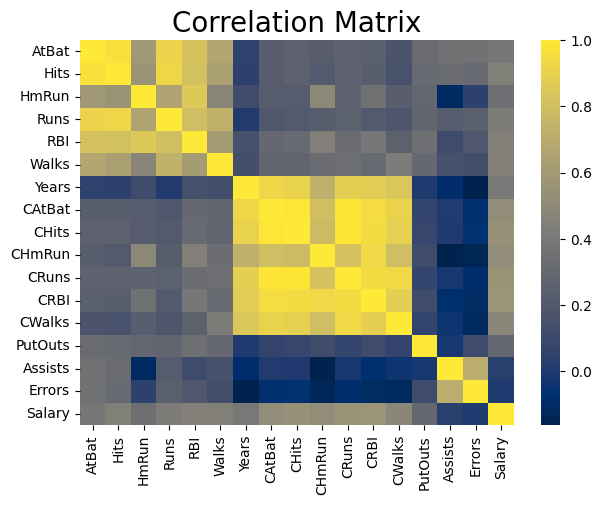

In [8]:
#correlation_matrix
correlation_matrix = df[num_cols].corr()

f, ax = plt.subplots(figsize=[7, 5])
sns.heatmap(correlation_matrix, annot=False,  ax=ax, cmap="cividis")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

* ***Analysis of Numerical Variables***

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


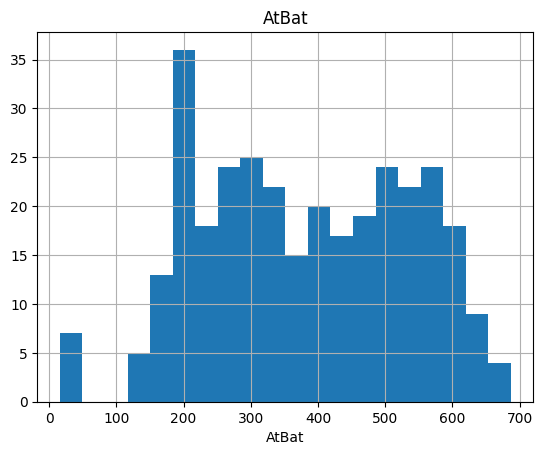

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


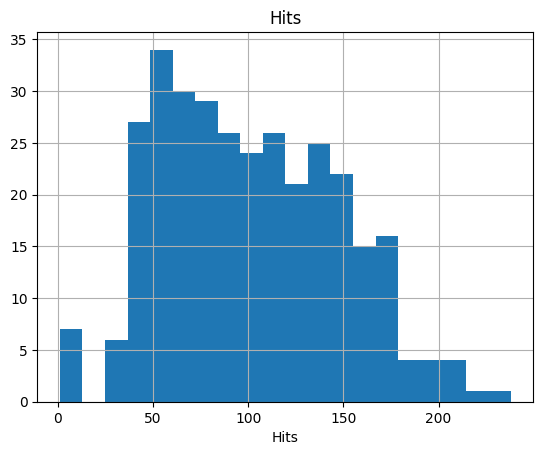

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


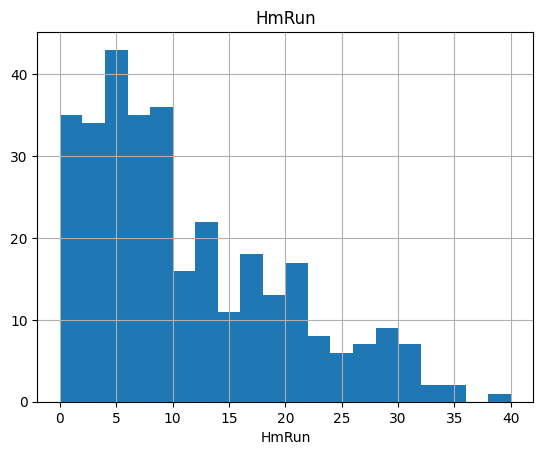

count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


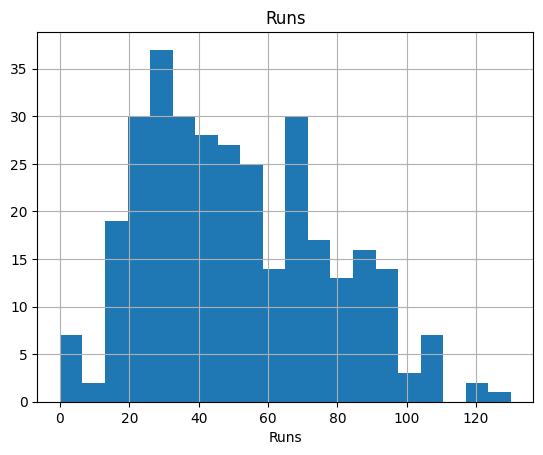

count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


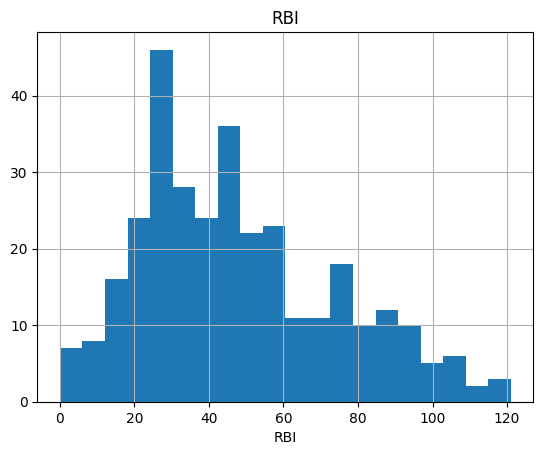

count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


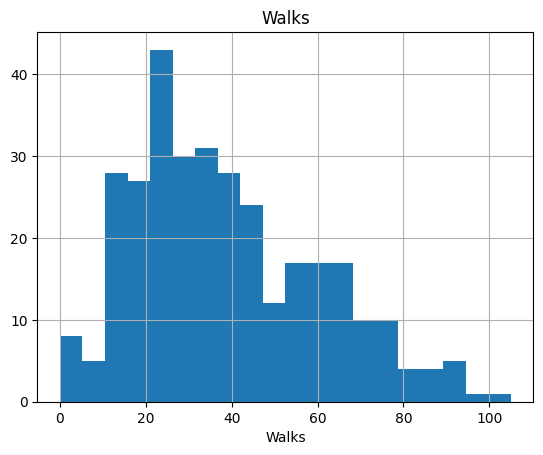

count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


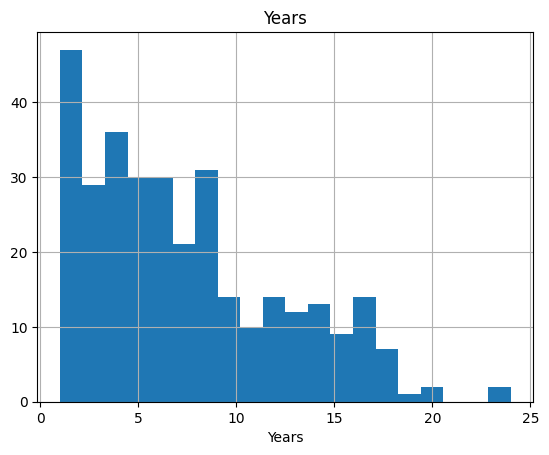

count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


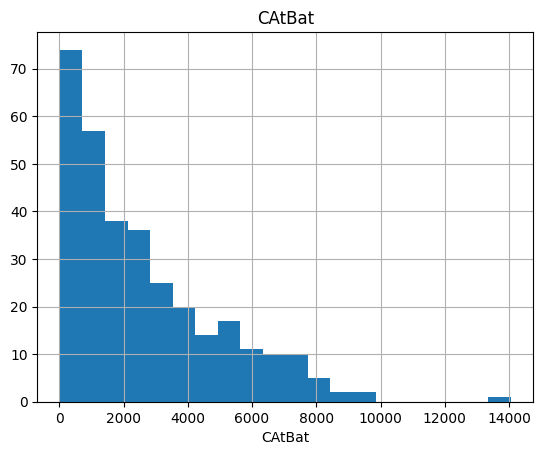

count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


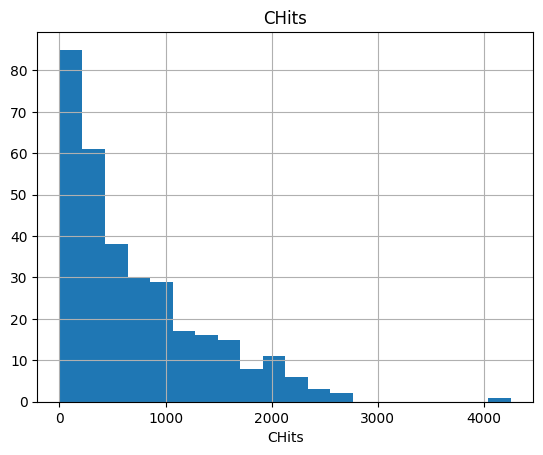

count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


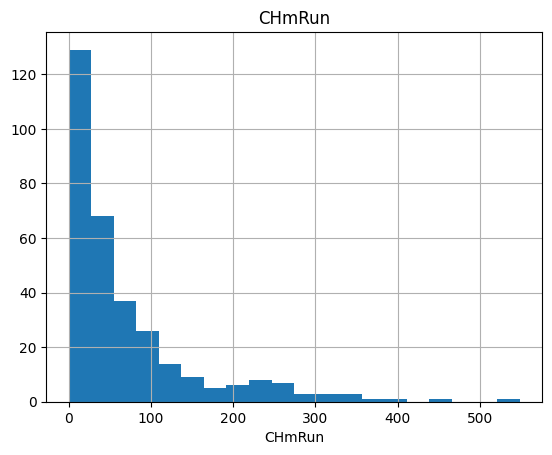

count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


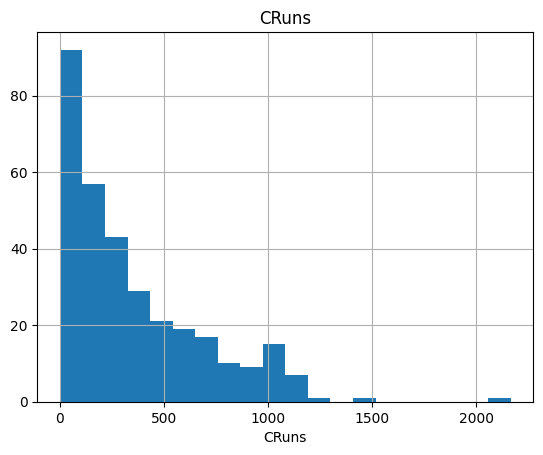

count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


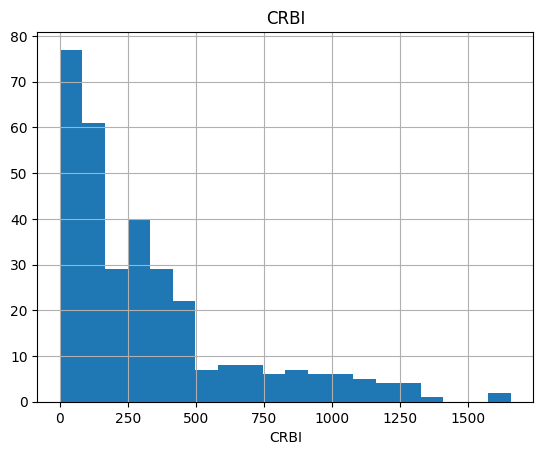

count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


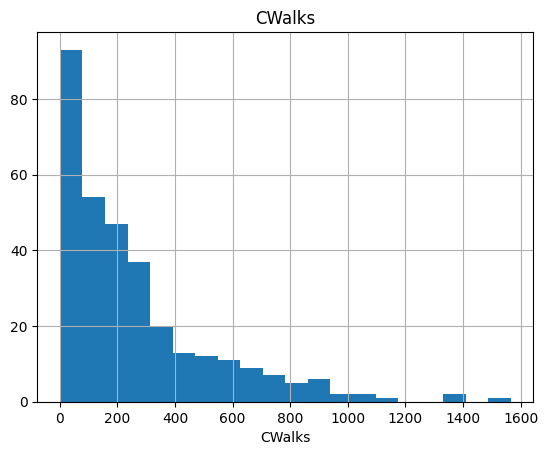

count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


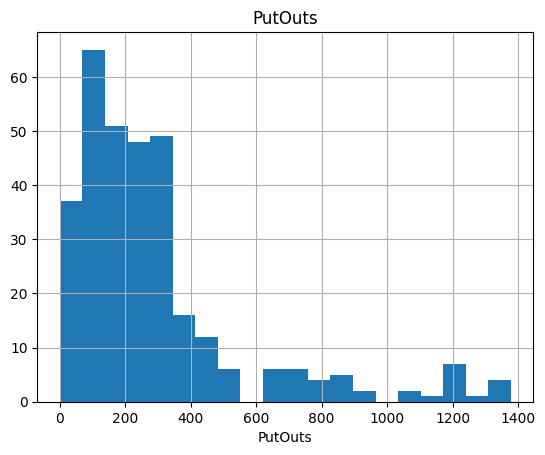

count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


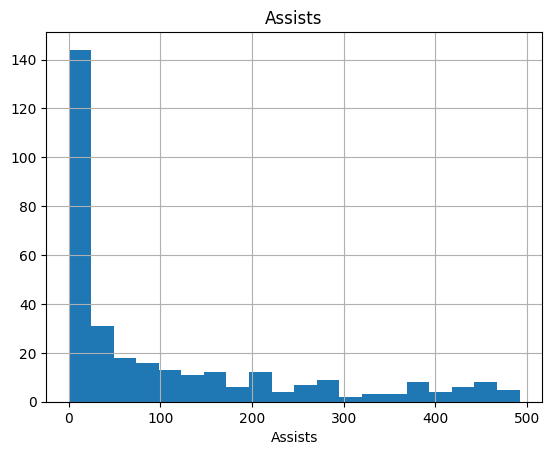

count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


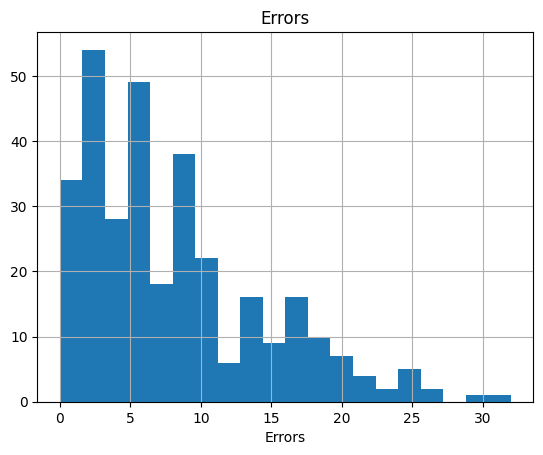

count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


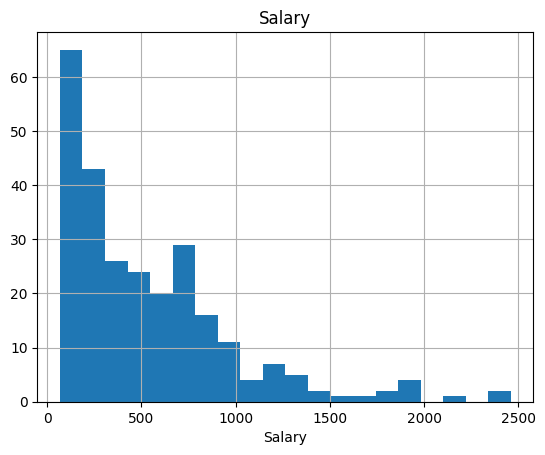

In [9]:
def num_summary(dataframe, num_cols, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_cols].describe(quantiles).T)

    if plot:
        dataframe[num_cols].hist(bins=20)
        plt.xlabel(num_cols)
        plt.title(num_cols)
        plt.show(block=True)
for col in num_cols:
    num_summary(df, col, plot=True)

* ***Analysis of Categorical Variables***

In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

        League  Ratio
League               
A          175 54.348
N          147 45.652
##########################################
          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
##########################################
           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
##########################################


* ***Outliers***

In [11]:

def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


* ***Missing Values***

In [12]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [13]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

missing_values_table(df)


        n_miss  ratio
Salary      59 18.320


In [14]:
df.dropna(inplace=True)

 * ***Feature Extraction***

In [15]:
df["NEW_assistances"] = df["PutOuts"] + df["Assists"]
df["NEW_successful_season"] = df["AtBat"] / df["CAtBat"]
df["NEW_successful_season1"] = df["Hits"] / df["CHits"]
df["NEW_successful_season2"] = df["Walks"] / df["CWalks"]
df["NEW_BattingAverage"] = df["Hits"] / df["AtBat"]
df["NEW_RunPerHit"] = df["Runs"] / df["Hits"]
df["NEW_WalksPerYear"] = df["Walks"] / df["Years"]
df["NEW_CareerBattingAverage"] = df["CHits"] / df["CAtBat"]
df["NEW_CareerRunPerHit"] = df["CRuns"] / df["CHits"]
df["NEW_CareerWalksPerYear"] = df["CWalks"] / df["Years"]

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_assistances,NEW_successful_season,NEW_successful_season1,NEW_successful_season2,NEW_BattingAverage,NEW_RunPerHit,NEW_WalksPerYear,NEW_CareerBattingAverage,NEW_CareerRunPerHit,NEW_CareerWalksPerYear
1,315,81,7,24,38,39,14,3449,835.000,69.000,321,414,375.000,N,W,632,43,10,475.000,N,675,0.091,0.097,0.104,0.257,0.296,2.786,0.242,0.384,26.786
2,479,130,18,66,72,76,3,1624,457.000,63.000,224,266,263.000,A,W,880,82,14,480.000,A,962,0.295,0.284,0.289,0.271,0.508,25.333,0.281,0.490,87.667
3,496,141,20,65,78,37,11,5628,1575.000,225.000,828,838,354.000,N,E,200,11,3,500.000,N,211,0.088,0.090,0.105,0.284,0.461,3.364,0.280,0.526,32.182
4,321,87,10,39,42,30,2,396,101.000,12.000,48,46,33.000,N,E,805,40,4,91.500,N,845,0.811,0.861,0.909,0.271,0.448,15.000,0.255,0.475,16.500
5,594,169,4,74,51,35,11,4408,1133.000,19.000,501,336,194.000,A,W,282,421,25,750.000,A,703,0.135,0.149,0.180,0.285,0.438,3.182,0.257,0.442,17.636


* ***Encoding***

In [16]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)


In [17]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_assistances,NEW_successful_season,NEW_successful_season1,NEW_successful_season2,NEW_BattingAverage,NEW_RunPerHit,NEW_WalksPerYear,NEW_CareerBattingAverage,NEW_CareerRunPerHit,NEW_CareerWalksPerYear
1,315,81,7,24,38,39,14,3449,835.000,69.000,321,414,375.000,1,1,632,43,10,475.000,1,675,0.091,0.097,0.104,0.257,0.296,2.786,0.242,0.384,26.786
2,479,130,18,66,72,76,3,1624,457.000,63.000,224,266,263.000,0,1,880,82,14,480.000,0,962,0.295,0.284,0.289,0.271,0.508,25.333,0.281,0.490,87.667
3,496,141,20,65,78,37,11,5628,1575.000,225.000,828,838,354.000,1,0,200,11,3,500.000,1,211,0.088,0.090,0.105,0.284,0.461,3.364,0.280,0.526,32.182
4,321,87,10,39,42,30,2,396,101.000,12.000,48,46,33.000,1,0,805,40,4,91.500,1,845,0.811,0.861,0.909,0.271,0.448,15.000,0.255,0.475,16.500
5,594,169,4,74,51,35,11,4408,1133.000,19.000,501,336,194.000,0,1,282,421,25,750.000,0,703,0.135,0.149,0.180,0.285,0.438,3.182,0.257,0.442,17.636


In [18]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols = [col for col in num_cols if col not in ["Salary"]]

* ***Feature Scaling***

In [19]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_assistances,NEW_successful_season,NEW_successful_season1,NEW_successful_season2,NEW_BattingAverage,NEW_RunPerHit,NEW_WalksPerYear,NEW_CareerBattingAverage,NEW_CareerRunPerHit,NEW_CareerWalksPerYear
1,0.443,0.338,0.175,0.185,0.314,0.371,0.565,0.244,0.207,0.143,0.147,0.248,0.239,1.000,1.000,0.459,0.087,0.312,475.000,1.000,0.454,0.077,0.085,0.104,0.675,0.351,0.043,0.294,0.207,0.295
2,0.689,0.544,0.450,0.508,0.595,0.724,0.087,0.114,0.113,0.131,0.103,0.159,0.168,0.000,1.000,0.639,0.167,0.438,480.000,0.000,0.647,0.284,0.275,0.289,0.721,0.602,0.390,0.547,0.388,0.990
3,0.714,0.591,0.500,0.500,0.645,0.352,0.435,0.400,0.391,0.468,0.382,0.504,0.226,1.000,0.000,0.145,0.022,0.094,500.000,1.000,0.142,0.074,0.078,0.105,0.763,0.547,0.052,0.537,0.449,0.356
4,0.452,0.363,0.250,0.300,0.347,0.286,0.043,0.027,0.024,0.025,0.021,0.026,0.020,1.000,0.000,0.585,0.081,0.125,91.500,1.000,0.569,0.808,0.860,0.909,0.720,0.531,0.231,0.377,0.363,0.177
5,0.861,0.709,0.100,0.569,0.421,0.333,0.435,0.313,0.281,0.039,0.231,0.201,0.123,0.000,1.000,0.205,0.856,0.781,750.000,0.000,0.473,0.121,0.138,0.180,0.764,0.519,0.049,0.390,0.306,0.190


# Model & Prediction

In [20]:
y = df["Salary"]
X = df.drop(["Salary"], axis=1)


In [21]:


models = [('LR', LinearRegression()),
          ("Ridge", Ridge(random_state=12345)),
          ("Lasso", Lasso(random_state=12345)),
          ("ElasticNet", ElasticNet(random_state=12345)),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor(random_state=12345)),
          ('RF', RandomForestRegressor(random_state=12345)),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor(random_state=12345)),
          # ("LightGBM", LGBMRegressor(random_state=12345)),
          # ("CatBoost", CatBoostRegressor(verbose=False, random_state=12345)),
          ("XGBoost", XGBRegressor(objective='reg:squarederror', random_state=12345))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 289.5787 (LR) 
RMSE: 307.8095 (Ridge) 
RMSE: 309.043 (Lasso) 
RMSE: 363.0489 (ElasticNet) 
RMSE: 321.7422 (KNN) 
RMSE: 389.3906 (CART) 
RMSE: 269.5163 (RF) 
RMSE: 449.4233 (SVR) 
RMSE: 259.7269 (GBM) 
RMSE: 303.0639 (XGBoost) 


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [23]:
from sklearn.metrics import mean_absolute_error
for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    print(f"MAE: {mae} ({name}) ")

MAE: 171.9426372238591 (LR) 
MAE: 170.07198908709552 (Ridge) 
MAE: 162.29628964700825 (Lasso) 
MAE: 252.8035008053735 (ElasticNet) 
MAE: 173.54896455696203 (KNN) 
MAE: 250.08375949367087 (CART) 
MAE: 135.69933481012652 (RF) 
MAE: 315.36031573711233 (SVR) 
MAE: 145.12695654882634 (GBM) 
MAE: 184.59892597980743 (XGBoost) 


In [24]:
rf_model = RandomForestRegressor(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [25]:
y_pred

array([ 749.43332,  572.24501,  859.84663,  383.89669,  569.11666,
       1100.32863,  840.026  ,  933.73331,  842.17331,  390.11667,
       1106.69322,   98.835  ,  177.715  ,  244.44002,  352.92001,
        385.52501,  496.175  ,  418.63341,  281.90005, 1328.25414,
        796.08333,  368.20834,  832.20902,  342.83335, 1254.55462,
        722.02832,  705.31666,  134.045  ,  309.44668, 1272.42074,
        763.01165,  318.81834,  659.65666,  296.70668,  440.84834,
        101.55   ,   77.685  ,   96.5    ,  806.95832,   82.775  ,
        625.61668,  203.84167,  445.50833, 1414.4609 ,   76.105  ,
         94.775  , 1468.22443, 1049.62603,  314.06167,  568.45568,
       1110.3625 ,  125.83   ,  170.71   ,  946.11168,  395.86671,
        548.92499,  715.94   ,  871.4736 , 1675.42838,  763.81166,
        517.25   ,   84.405  ,  639.785  ,  480.90834,  918.75664,
        197.94   ,  556.28166,  215.905  ,  619.44168,  189.15834,
        610.33332,  521.91667,  932.96423,  973.23164,  206.57

> # Feature Importance

    Value                   Feature
10  0.152                     CRuns
11  0.117                      CRBI
8   0.102                     CHits
4   0.055                       RBI
26  0.054  NEW_CareerBattingAverage
0   0.050                     AtBat
9   0.047                    CHmRun
25  0.042          NEW_WalksPerYear
5   0.042                     Walks
3   0.032                      Runs
2   0.030                     HmRun
21  0.030    NEW_successful_season1
7   0.030                    CAtBat
12  0.029                    CWalks
28  0.026    NEW_CareerWalksPerYear
15  0.025                   PutOuts
24  0.021             NEW_RunPerHit
1   0.020                      Hits
19  0.016           NEW_assistances
22  0.014    NEW_successful_season2
23  0.013        NEW_BattingAverage
27  0.013       NEW_CareerRunPerHit
17  0.009                    Errors
6   0.009                     Years
16  0.008                   Assists
20  0.007     NEW_successful_season
14  0.005                  D

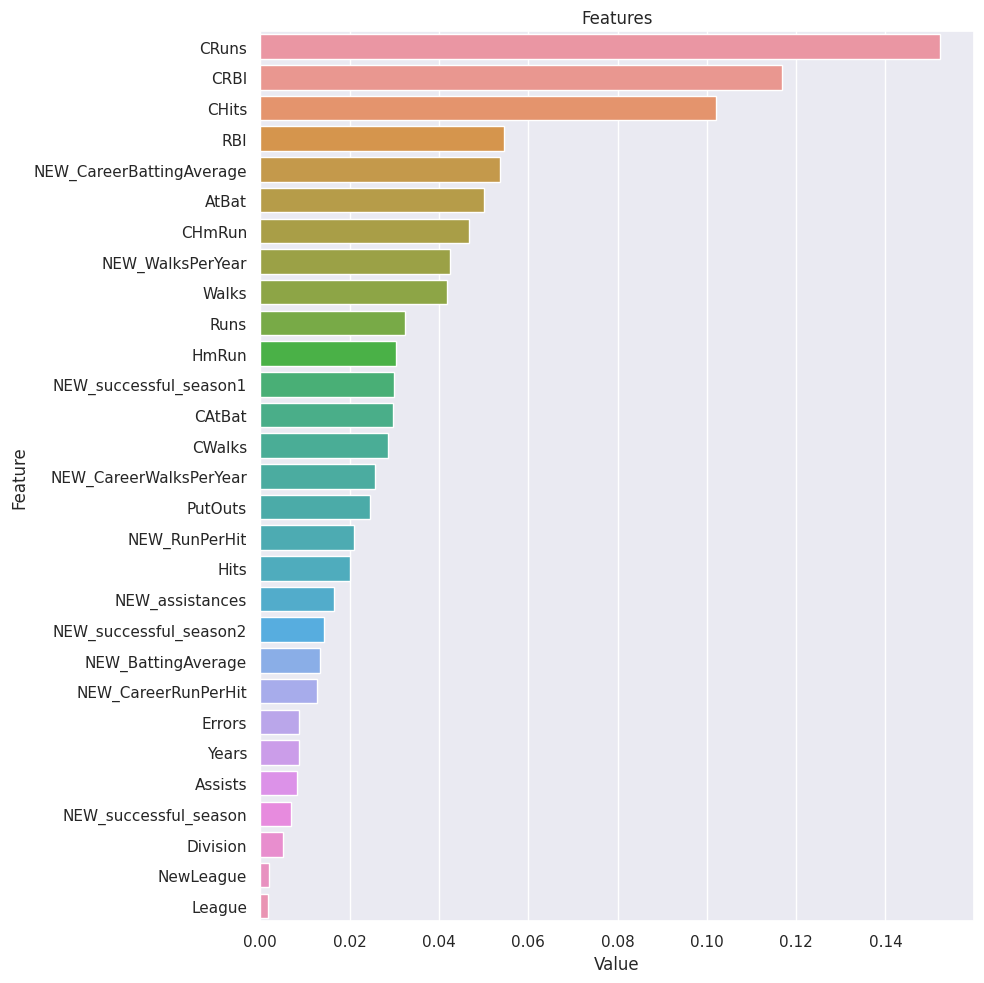

In [26]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X)
